### 📚 1. importing libraries

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### 📟 2. importing dataset

In [3]:
# Tell Python to remember a main folder path
path = r'/Users/ashwanisherawat/Downloads/Instacart Basket Analysis/02 Data'

In [4]:
# Import and identify dataframes
df = pd.read_pickle(os.path.join(path, 'Prepared Data', 'ords_prods_customer_merge.pkl'))

### 🚨 3. df had a PII - making it data analyst friendly (no PII)

In [5]:
# dropping the pii columns (first_name and surname, safety reasons) and merge column

df = df.drop(['First Name', 'Last Name', '_merge'], axis=1)

In [6]:
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,Unnamed: 0,...,spending_flag,median_days_between_orders,order_frequency_flag,Gender,State,Age,Date Joined,Number of Dependents,Family Status,Income
0,2539329,1,1,2,8,NaN,196,1,0,195.0,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2539329,1,1,2,8,NaN,14084,2,0,14084.0,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,2539329,1,1,2,8,NaN,12427,3,0,12427.0,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2539329,1,1,2,8,NaN,26088,4,0,26089.0,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,2539329,1,1,2,8,NaN,26405,5,0,26406.0,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


In [7]:
df.shape

(32435059, 29)

In [8]:
df.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'Unnamed: 0', 'product_name',
       'aisle_id', 'department_id', 'prices', 'busiest_day',
       'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_product_price', 'spending_flag', 'median_days_between_orders',
       'order_frequency_flag', 'Gender', 'State', 'Age', 'Date Joined',
       'Number of Dependents', 'Family Status', 'Income'],
      dtype='object')

In [9]:
df.describe

<bound method NDFrame.describe of           order_id  user_id  order_number  orders_day_of_week  \
0          2539329        1             1                   2   
1          2539329        1             1                   2   
2          2539329        1             1                   2   
3          2539329        1             1                   2   
4          2539329        1             1                   2   
...            ...      ...           ...                 ...   
32435054   2977660   206209            13                   1   
32435055   2977660   206209            13                   1   
32435056   2977660   206209            13                   1   
32435057   2977660   206209            13                   1   
32435058   2977660   206209            13                   1   

          order_hour_of_day  days_since_prior_order  product_id  \
0                         8                     NaN         196   
1                         8                     NaN

### 🌍 4. creating region groups in df

In [10]:
# creating an empty list to store the region results
region_result = []

# creating the conditions (which state is which region)
for state in df["State"]:
    if state in ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 
                 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 
                 'New Jersey']:
        region_result.append("Northeast")
    elif state in ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 
                   'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 
                   'Minnesota', 'Iowa', 'Missouri']:
        region_result.append("Midwest")
    elif state in ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 
                   'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 
                   'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 
                   'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']:
        region_result.append("South")
    elif state in ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 
                   'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 
                   'California', 'Hawaii']:
        region_result.append("West")
    else:
        region_result.append("Unknown")

In [11]:
# adding the new region list as a column to the df
df['region'] = region_result

### checking what's the frequency of users and orders in those regions

In [12]:
# Step 1: Distinct on user_id level
df_distinct_user = df.drop_duplicates(subset='user_id')

# Crosstab for user_id level (Region vs Spending Flag)
crosstab_user = pd.crosstab(df_distinct_user['region'], df_distinct_user['spending_flag'], dropna=False)

# Step 2: Distinct on order_id level
df_distinct_order = df.drop_duplicates(subset='order_id')

# Crosstab for order_id level (Region vs Spending Flag)
crosstab_order = pd.crosstab(df_distinct_order['region'], df_distinct_order['spending_flag'], dropna=False)

# Display the crosstabs
print("Crosstab for distinct user_id level:")
print(crosstab_user)

print("\nCrosstab for distinct order_id level:")
print(crosstab_order)

Crosstab for distinct user_id level:
spending_flag  High spender  Low spender
region                                  
Midwest                1263        47256
Northeast               883        35505
South                  1817        66920
West                   1394        51171

Crosstab for distinct order_id level:
spending_flag  High spender  Low spender
region                                  
Midwest               17064       737263
Northeast             12166       555019
South                 24796      1046845
West                  18647       803074


### Comments : 
The crosstab analysis reveals significant regional and behavioral trends in spending. At the user level, low spenders dominate across all regions, with the **South** having the largest user base and high spender count, indicating strong potential for growth. At the order level, high spenders contribute significantly to order volumes, though low spenders overwhelmingly drive total activity. The South and West lead in engagement, while the Northeast and Midwest show smaller but promising user and order bases. Strategies should focus on converting low spenders to high spenders in high-performing regions while tailoring campaigns to boost engagement in underperforming areas. Enhanced targeting, personalized incentives, and operational adjustments can drive growth and optimize regional performance.

###  5. Creating a exclusion flag - filtering out the users with less than 5 orders

In [13]:
# creating the column holding maximum orders per user

df['max_order'] = df.groupby(['user_id'])['order_number'].transform(np.max)

In [14]:
# creating an exclusion flag for low activity users who have less than 5 orders

df.loc[df['max_order'] < 5, 'exclusion_flag'] = 'Low-activity customer'

In [15]:
# creating an exclusion flag for low activity users who have equal and more than 5 orders

df.loc[df['max_order'] >= 5, 'exclusion_flag'] = 'Regular-activity customer'

In [16]:
# granulation on order_id level, order quantity (not distinct user_id)

df['exclusion_flag'].value_counts()

Regular-activity customer    30993489
Low-activity customer         1441570
Name: exclusion_flag, dtype: int64

exclusion_flag:
Regular-activity customer    30992664 | Low-activity customer         1441548

In [17]:
exclusion_counts = df.groupby('exclusion_flag')['user_id'].nunique().reset_index()
exclusion_counts.columns = ['exclusion_flag', 'unique_user_count']  # Rename columns for clarity

In [18]:
# granulation on user_id level, not order quantity 

exclusion_counts

,exclusion_flag,unique_user_count
0,Low-activity customer,43576
1,Regular-activity customer,162633


In [19]:
# filtering out the low-activity users and creating the new dataset 
df_2 = df[df['exclusion_flag'] != 'Low-activity customer']

In [20]:
# checking if low-activity customers were filtered out 

df_2['exclusion_flag'].value_counts()

Regular-activity customer    30993489
Name: exclusion_flag, dtype: int64

In [21]:
# checking if the numbers are correct 

df_2['user_id'].nunique()

162633

##  6. Creating Customer Profiling Variables

### age groups: young adults, adults, elderly adults

In [22]:
# age profile is from 18 to 81 

df_2['Age'].describe()

count    3.099349e+07
mean     4.946786e+01
std      1.848521e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: Age, dtype: float64

In [23]:
# Young Adults: Ages 18 to 34 (inclusive)
df_2.loc[(df_2['Age'] >= 18) & (df_2['Age'] <= 34), 'Age_group'] = 'Young adults'

/var/folders/bv/0q7zxbg57q32000r2xxtsc4c0000gn/T/ipykernel_58369/610642401.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2.loc[(df_2['Age'] >= 18) & (df_2['Age'] <= 34), 'Age_group'] = 'Young adults'


In [24]:
# Adults: Ages 35 to 64 (inclusive)
df_2.loc[(df_2['Age'] >= 35) & (df_2['Age'] <= 64), 'Age_group'] = 'Adults'

In [25]:
# Elderly Persons: Ages 65 and above
df_2.loc[df_2['Age'] >= 65, 'Age_group'] = 'Elderly adults'

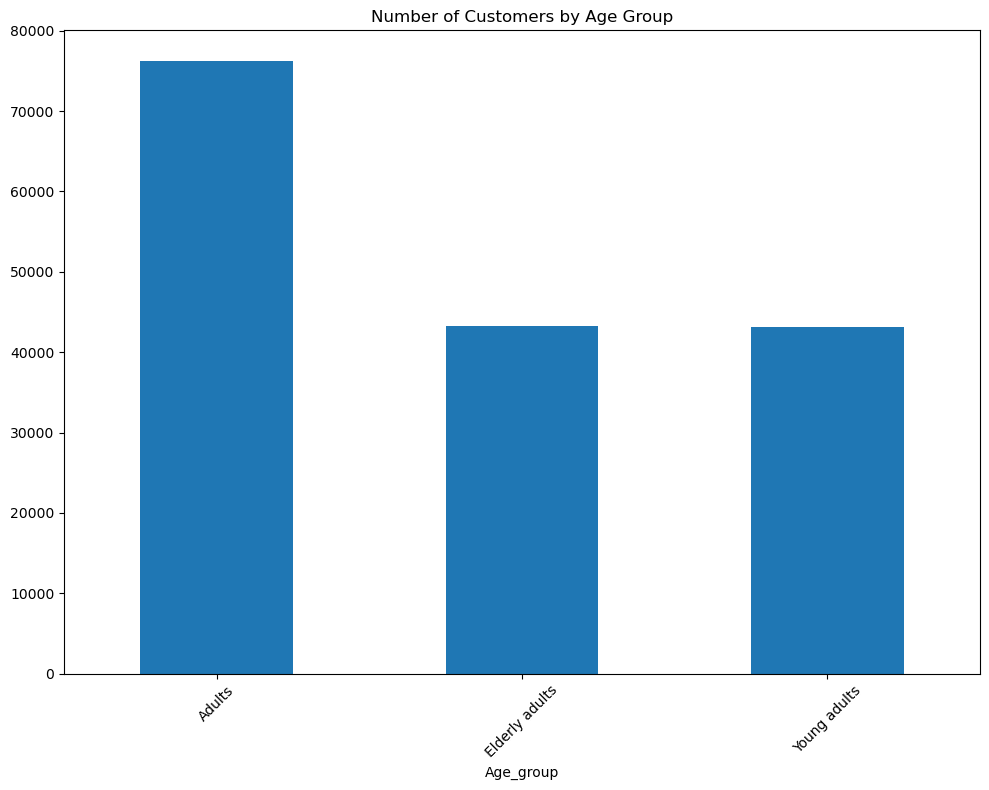

In [26]:
# Count unique user_ids for each age_group
age_group_counts = df_2.groupby('Age_group')['user_id'].nunique().sort_index()

# Plot the bar graph with adjusted figure size
plt.figure(figsize=(10, 8))  # Adjust the figure size to make it taller
bar_1 = age_group_counts.plot.bar()
bar_1.set_title('Number of Customers by Age Group')

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig('unique_customers_by_age_group.png', bbox_inches='tight', dpi=300)
plt.show()

In [27]:
# exporting the crosstab 

bar_1.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_categories.png'))

### Comments: 
In this chart, we see the distribution of customers by age group: **Adults**, **Elderly adults**, and **Young adults**. It's clear that **Adults** make up the largest segment of our customer base, far surpassing the other two groups. This indicates that our primary audience is within the mid-age range, which should be a major focus for our marketing and product strategies. However, the similar numbers for **Elderly adults** and **Young adults** suggest there’s potential to explore targeted campaigns or offerings to better engage these groups and balance the customer distribution. Overall, this insight helps prioritize resource allocation and tailor strategies to meet the needs of each demographic effectively.

Adults (35-64 years old) are the biggest group of customers in our database.

### Creating crosstab martial status Family status vs. age group

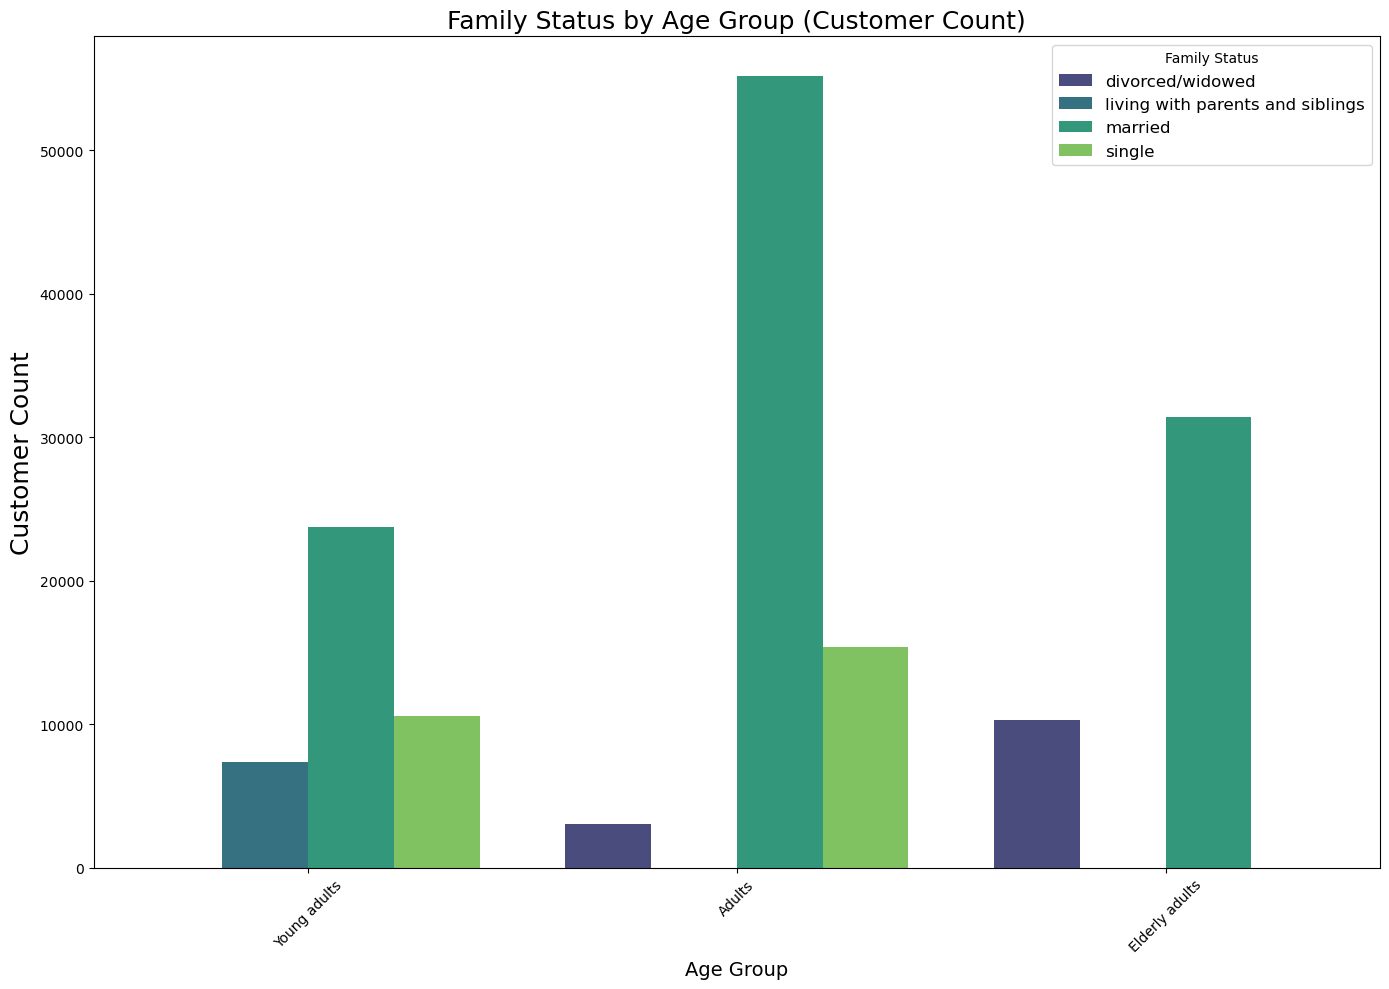

In [114]:
# Step 1: Group by age_group and fam_status, then count unique user_ids
crosstab = df_2.groupby(['Age_group', 'Family Status'])['user_id'].nunique().unstack(fill_value=0)

# Step 2: Reset index and melt the crosstab to long-form DataFrame
crosstab_melted = crosstab.reset_index().melt(id_vars='Age_group', var_name='Family Status', value_name='count')

# Define the order for age_group: young adults -> adults -> elderly adults
age_order = ['Young adults', 'Adults', 'Elderly adults']

# Set the order for the age_group column using pd.Categorical
crosstab_melted['Age_group'] = pd.Categorical(crosstab_melted['Age_group'], categories=age_order, ordered=True)

# Step 3: Create a grouped bar chart
plt.figure(figsize=(14, 10))
bar_2 = sns.barplot(x='Age_group', y='count', hue='Family Status', data=crosstab_melted, palette='viridis')

# Add title and labels
plt.title('Family Status by Age Group (Customer Count)', fontsize=18)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Customer Count', fontsize=18)
plt.legend(title='Family Status', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.tight_layout()
plt.show()

In [29]:
# exporting the crosstab 

bar_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_vs_fam.png'))

### Income groups: Low, medium and High income

In [30]:
df_2['Income'].describe()

count    3.099349e+07
mean     9.967349e+04
std      4.313999e+04
min      2.590300e+04
25%      6.728900e+04
50%      9.676500e+04
75%      1.281010e+05
max      5.939010e+05
Name: Income, dtype: float64

In [31]:
# creating income buckets based on the 25th and 75th percentiles
# low income

df_2.loc[df_2['Income'] < 67289, 'Income_group'] = 'Low Income'

/var/folders/bv/0q7zxbg57q32000r2xxtsc4c0000gn/T/ipykernel_58369/2273794520.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2.loc[df_2['Income'] < 67289, 'Income_group'] = 'Low Income'


In [32]:
# medium income 
df_2.loc[(df_2['Income'] >= 67289) & (df_2['Income'] <= 128101), 'Income_group'] = 'Medium Income'

In [33]:
# high income
df_2.loc[df_2['Income'] > 128101, 'Income_group'] = 'High Income'

/var/folders/bv/0q7zxbg57q32000r2xxtsc4c0000gn/T/ipykernel_58369/2494260493.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['Income_group'] = df_2['Income_group'].astype(Income_order)


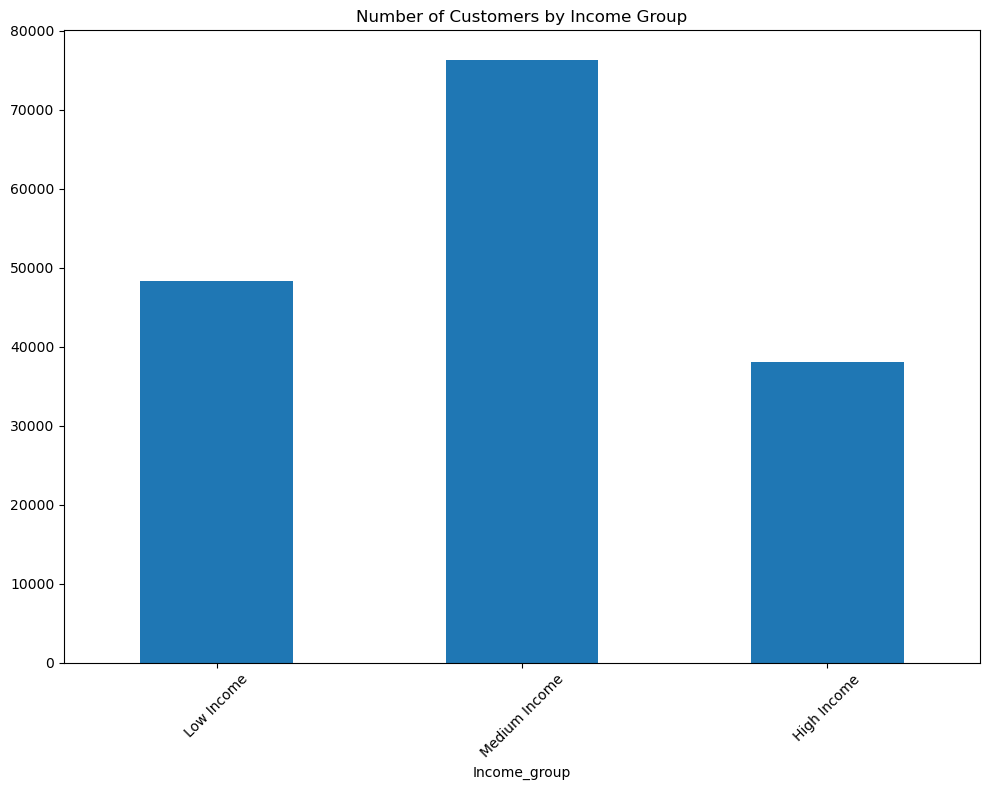

In [34]:
import pandas as pd

# Define the desired order for income groups
Income_order = pd.CategoricalDtype(categories=['Low Income', 'Medium Income', 'High Income'], ordered=True)

# Assign the ordered categories to the income_group column
df_2['Income_group'] = df_2['Income_group'].astype(Income_order)

# Count unique user_ids for each income_group
Income_group_counts = df_2.groupby('Income_group')['user_id'].nunique().sort_index()

# Plot the bar graph with 45-degree x-axis label rotation
plt.figure(figsize=(10, 8))  # Adjust the figure size if needed
bar_3 = Income_group_counts.plot.bar()
bar_3.set_title('Number of Customers by Income Group')

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig('unique_customers_by_Income_group.png', bbox_inches='tight', dpi=300)
plt.show()

In [35]:
# exporting the crosstab 

bar_3.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Income_group.png'))

####  Comments: 
The chart shows that the **Medium income** group dominates our customer base, followed by **Low income** and then **High income** groups. This suggests focusing on value-driven offerings for the medium-income segment, affordable options for low-income customers, and premium products for the high-income group. These insights help tailor strategies to better meet the needs of each income group.

###  7. Merging department names to the df 

In [36]:
# importing department dataset

df_dep = pd.read_csv(os.path.join(path, 'Prepared Data', 'departments_wrangled.csv'), index_col = False)

In [37]:
# Step 1: Rename 'Unnamed: 0' to 'department_id'
df_dep.rename(columns={'Unnamed: 0': 'department_id'}, inplace=True)

# Step 2: Convert 'department_id' to int64
df_dep['department_id'] = pd.to_numeric(df_dep['department_id'], errors='coerce').astype('int64')

# Step 3: Verify the result
print(df_dep.dtypes)  # Check the data types of all columns
print(df_dep.head())  # Display the first few rows of the DataFrame

department_id     int64
department       object
dtype: object
   department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol


In [38]:
df_dep.head(30)

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [39]:
df_2.shape

(30993489, 33)

In [40]:
df_2=df_2.sample(2000000)

In [41]:
df_final = df_2.merge(df_dep, on='department_id', how='left', indicator=True)
print(df_final['_merge'].value_counts())  # Check which rows matched


both          1998209
left_only        1791
right_only          0
Name: _merge, dtype: int64


In [42]:
# Rename columns if needed
df_2.rename(columns={'Department_ID': 'department_id'}, inplace=True)
df_dep.rename(columns={'Dept_ID': 'department_id'}, inplace=True)

# Merge DataFrames
df_final = df_2.merge(df_dep, on='department_id', how='inner', indicator=True)


In [43]:
# checking if merging was successful 

df_final['_merge'].value_counts()

both          1998209
left_only           0
right_only          0
Name: _merge, dtype: int64

In [44]:
# dropping _merge column

df_final = df_final.drop(['_merge'], axis=1)

In [45]:
df_final.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,Unnamed: 0,...,Age,Date Joined,Number of Dependents,Family Status,Income,region,exclusion_flag,Age_group,Income_group,department
0,1502001,192797,51,1,13,7.0,5120,2,1,5120.0,...,41,6/20/2018,0,single,34213,Midwest,Regular-activity customer,Adults,Low Income,dairy eggs
1,2618071,99495,71,5,21,2.0,5785,11,1,5785.0,...,50,3/15/2018,1,married,129850,West,Regular-activity customer,Adults,High Income,dairy eggs
2,68578,173186,15,1,11,11.0,29094,28,1,29096.0,...,23,11/1/2017,0,single,46462,South,Regular-activity customer,Young adults,Low Income,dairy eggs
3,269326,152406,35,5,10,7.0,5750,18,1,5750.0,...,44,1/4/2019,3,married,101334,South,Regular-activity customer,Adults,Medium Income,dairy eggs
4,1030934,81942,20,6,10,6.0,17949,7,1,17949.0,...,18,8/19/2017,1,living with parents and siblings,82283,Midwest,Regular-activity customer,Young adults,Medium Income,dairy eggs


In [46]:
df_final.shape

(1998209, 34)

### 👪 8. creating number of dependants group

In [47]:
df_final['Number of Dependents'].value_counts()

3    501083
0    500238
2    498839
1    498049
Name: Number of Dependents, dtype: int64

Text(0.5, 1.0, 'Number of Unique Customers by Number of Dependants')

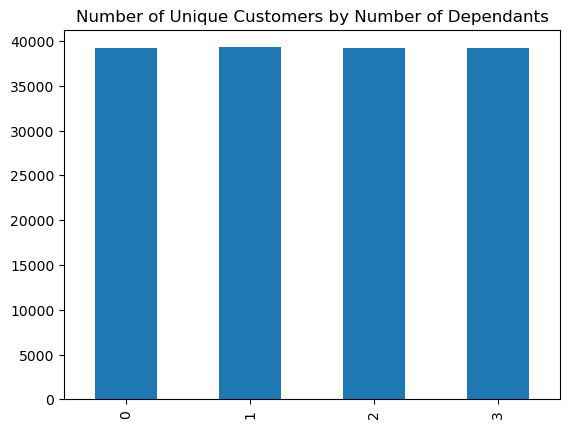

In [48]:
# Calculate the distinct count of user_id for each n_dependants value
dependant_counts = df_final.drop_duplicates(subset='user_id')['Number of Dependents'].value_counts().sort_index()

# Plot the bar graph
bar_4 = dependant_counts.plot.bar()
bar_4.set_title('Number of Unique Customers by Number of Dependants')

In [49]:
# Adjust layout and figure size if needed
bar_4.figure.set_size_inches(10, 6)  # Adjust the width and height as needed
plt.tight_layout()  # Automatically adjust layout

# Save the figure using the correct reference
bar_4.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'no_kids_bar.png'), bbox_inches='tight', dpi=300)

<Figure size 640x480 with 0 Axes>

In [50]:
# Creating an empty list to store the dependent results
dependants_result = []

# Creating the conditions based on the number of dependents
for n_dependants in df_final['Number of Dependents']:
    if n_dependants == 0:
        dependants_result.append("no kids")  # no kids
    elif n_dependants == 1:
        dependants_result.append("small family (1 kid)")  # small family
    elif n_dependants in [2, 3]:
        dependants_result.append("big family (2-3 kids)")  # big family with 2 or 3 kids

# Adding the results to the DataFrame as a new column
df_final['dependants_group'] = dependants_result

### checking what's the distribution of unique users based on dependants group and family status

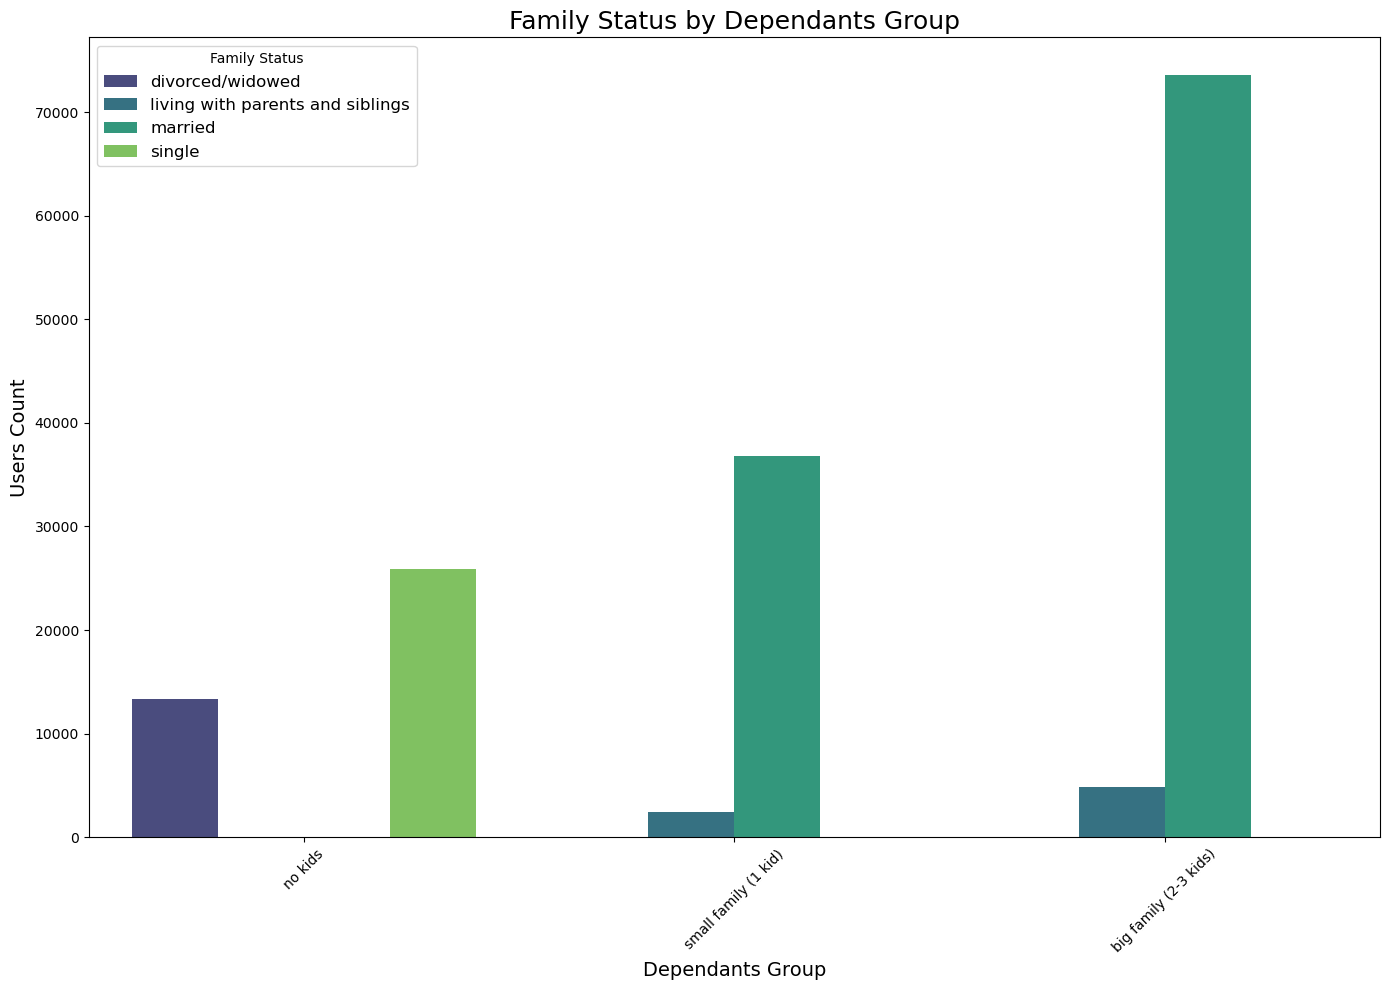

In [113]:
# Create a crosstab for dependants_group and fam_status
crosstab = df_final.groupby(['dependants_group', 'Family Status'])['user_id'].nunique().unstack(fill_value=0)

# Reset index and melt the crosstab to long-form DataFrame for plotting
crosstab_melted = crosstab.reset_index().melt(id_vars='dependants_group', var_name='Family Status', value_name='count')

# Define the order for dependants_group: No Kids -> Small Family -> Big Family
dependants_order = ['no kids', 'small family (1 kid)', 'big family (2-3 kids)']

# Set the order for the dependants_group column using pd.Categorical
crosstab_melted['dependants_group'] = pd.Categorical(crosstab_melted['dependants_group'], categories=dependants_order, ordered=True)

# Step 2: Create a grouped bar chart
plt.figure(figsize=(14, 10))
bar = sns.barplot(x='dependants_group', y='count', hue='Family Status', data=crosstab_melted, palette='viridis')

# Add title and labels
plt.title('Family Status by Dependants Group', fontsize=18)
plt.xlabel('Dependants Group', fontsize=14)
plt.ylabel('Users Count', fontsize=14)
plt.legend(title='Family Status',fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary

# Save the plot as a file (e.g., PNG or JPG)
plt.tight_layout()  # Ensure layout fits within the figure
plt.savefig('family_status_dependants_group.png', dpi=300)  # Save with high resolution (300 dpi)

# Show the plot
plt.show()

In [52]:
# exporting the crosstab 

bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Dependents_group.png'))

### checking the distribution of quantity of orders based on dependants group and family status

Family Status          divorced/widowed  living with parents and siblings  \
dependants_group                                                            
big family (2-3 kids)                 0                             42167   
no kids                          114514                                 0   
small family (1 kid)                  0                             21745   

Family Status          married  single  
dependants_group                        
big family (2-3 kids)   627527       0  
no kids                      0  220187  
small family (1 kid)    311584       0  


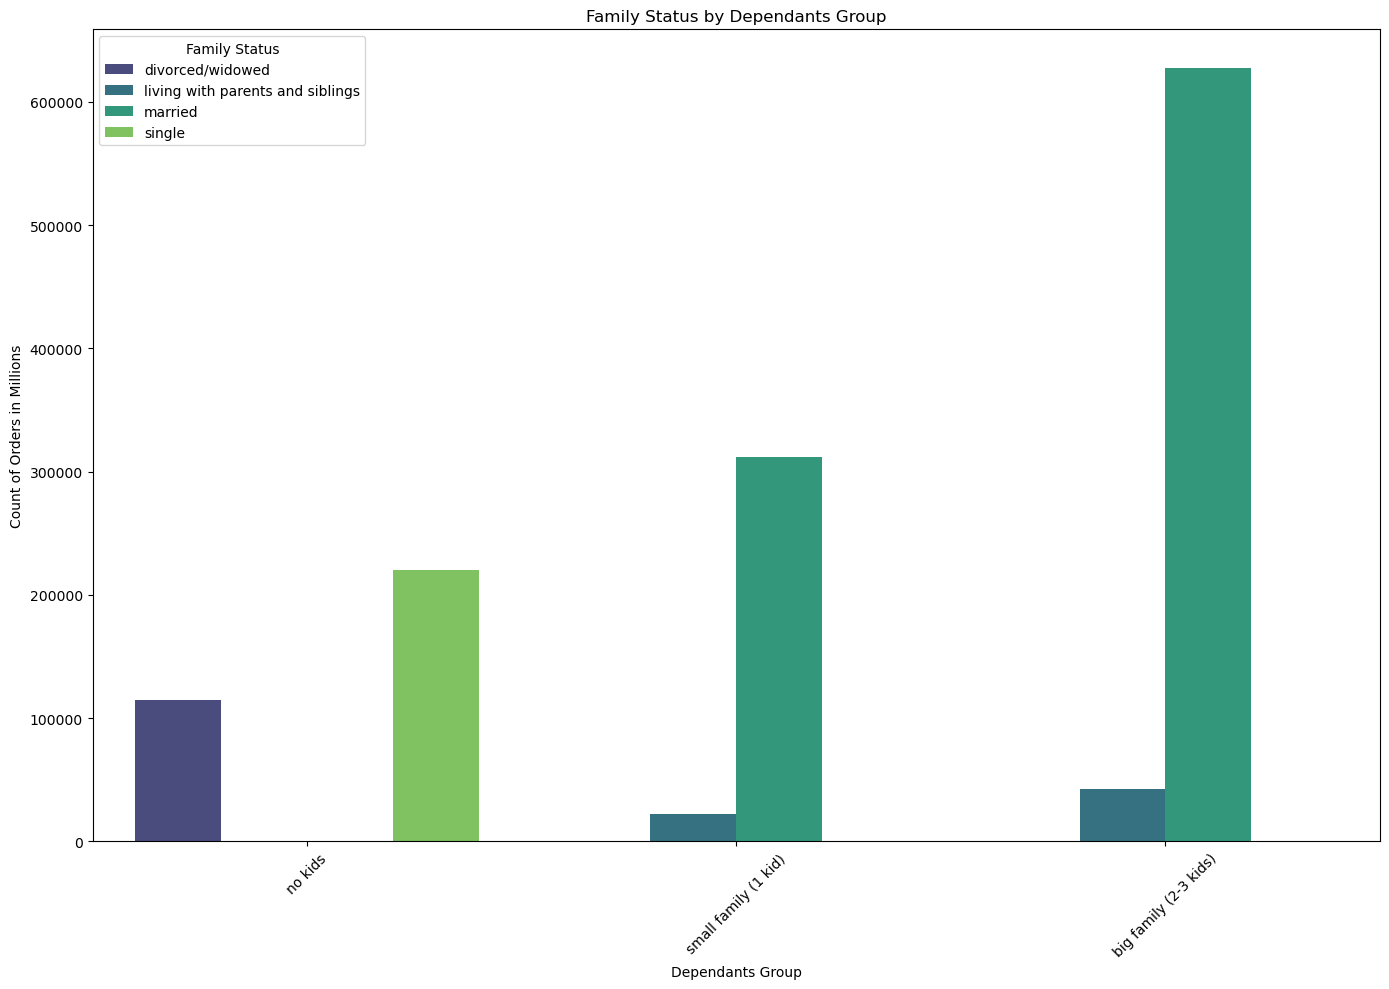

In [53]:
# Create a crosstab for dependants_group and fam_status
crosstab = df_final.groupby(['dependants_group', 'Family Status'])['order_id'].nunique().unstack(fill_value=0)

# Display the crosstab
print(crosstab)

# Reset index and melt the crosstab to long-form DataFrame for plotting
crosstab_melted = crosstab.reset_index().melt(id_vars='dependants_group', var_name='Family Status', value_name='count')

# Define the order for dependants_group: No Kids -> Small Family -> Big Family
dependants_order = ['no kids', 'small family (1 kid)', 'big family (2-3 kids)']

# Set the order for the dependants_group column using pd.Categorical
crosstab_melted['dependants_group'] = pd.Categorical(crosstab_melted['dependants_group'], categories=dependants_order, ordered=True)

# Step 2: Create a grouped bar chart
plt.figure(figsize=(14, 10))
bar = sns.barplot(x='dependants_group', y='count', hue='Family Status', data=crosstab_melted, palette='viridis')

# Add title and labels
plt.title('Family Status by Dependants Group')
plt.xlabel('Dependants Group')
plt.ylabel('Count of Orders in Millions')
plt.legend(title='Family Status')
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig('family_status_by_dependants_group.png', bbox_inches='tight', dpi=300)
plt.show()

### 9. 📅 quantity of orders per day of the week

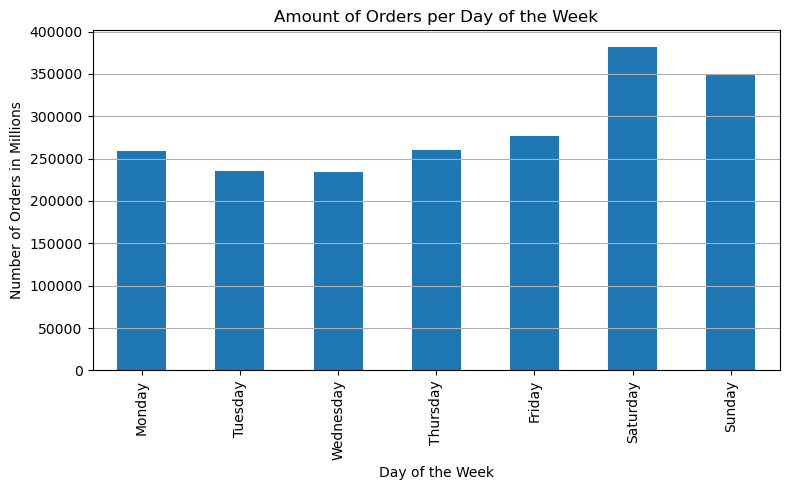

In [54]:
# Create a dictionary to map the day numbers to day names
day_mapping = {
    0: 'Saturday',
    1: 'Sunday',
    2: 'Monday',
    3: 'Tuesday',
    4: 'Wednesday',
    5: 'Thursday',
    6: 'Friday'
}

# Create a new order for the days of the week starting from Monday
ordered_days = [2, 3, 4, 5, 6, 0, 1]  # Order: Monday, Tuesday, Wednesday, Thursday, Friday, Saturday, Sunday

# Calculate the count of orders per day of the week
order_counts = df_final['orders_day_of_week'].value_counts()

# Reorder the counts based on the new order
reordered_counts = order_counts.reindex(ordered_days).fillna(0)  # Fill NaN with 0 for days with no orders

# Plot the count of orders per day of the week
bar_dow = reordered_counts.plot(kind='bar', figsize=(8, 5))

# Set custom x-axis labels using the day mapping
bar_dow.set_xticklabels([day_mapping[day] for day in ordered_days])

# Add a title and labels
plt.title('Amount of Orders per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders in Millions')
plt.grid(axis='y')  # Optional: add horizontal grid lines for readability

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig('amount_of_orders_per_day_of_week.png', bbox_inches='tight', dpi=300)
plt.show()

In [55]:
# exporting the crosstab 

bar_dow.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Amount_of_Orders_per_Day_of_the_Week.png'))

### 10. ⏰ quantity of orders per hour of the day

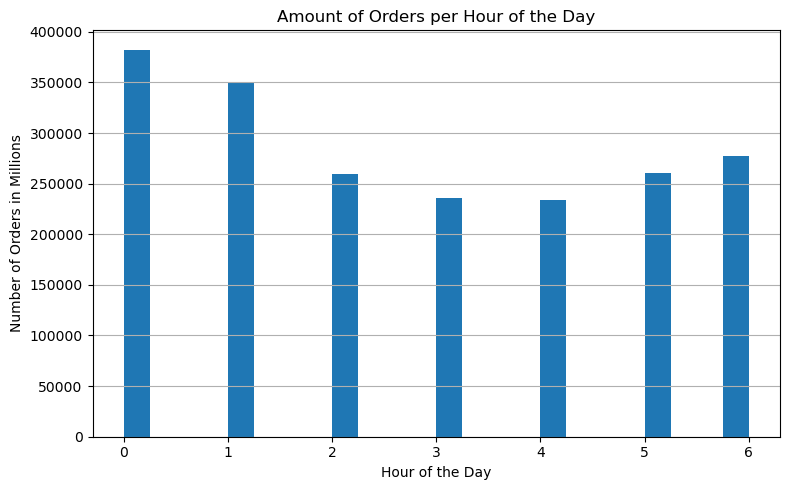

In [56]:
# Plotting the histogram for 'order_hour_of_day' with 24 bins to represent each hour
hist_hour = df_final['orders_day_of_week'].plot.hist(bins=24, figsize=(8, 5))

# Adding a title and axis labels
plt.title('Amount of Orders per Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders in Millions')
plt.grid(axis='y')  # Optional: add horizontal grid lines for readability

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig('amount_of_orders_per_hour_of_day.png', bbox_inches='tight', dpi=300)
plt.show()

In [57]:
# exporting the crosstab 

hist_hour.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'orders_day_of_week.png'))

### 🗓️ 11. creating weekday and weekend group

In [58]:
# List to store the results
day_result = []

for value in df_final["orders_day_of_week"]:
    if value in [0, 1]:  # 0: Saturday, 1: Sunday (Weekend)
        day_result.append("Weekend")
    elif value in [2, 3, 4, 5, 6]:  # 2: Monday, 3: Tuesday, 4: Wednesday, 5: Thursday, 6: Friday (Weekday)
        day_result.append("Weekday")
    else:
        day_result.append("Unknown")  # For any unexpected values

# Adding the new classification to the DataFrame
df_final['day_group'] = day_result

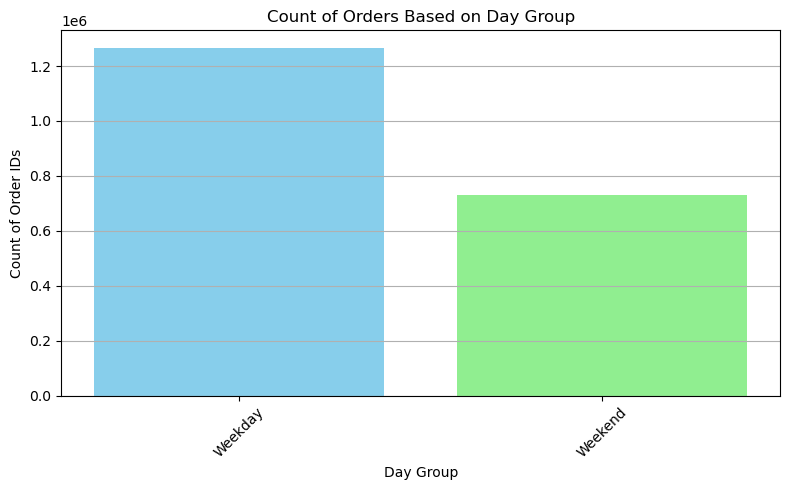

In [59]:
# Group by 'day_group' and count the number of 'order_id's
order_counts = df_final.groupby('day_group')['order_id'].count().reset_index()

# Create a bar chart
plt.figure(figsize=(8, 5))
bar_5 = plt.bar(order_counts['day_group'], order_counts['order_id'], color=['skyblue', 'lightgreen'])
plt.title('Count of Orders Based on Day Group')
plt.xlabel('Day Group')
plt.ylabel('Count of Order IDs')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig('count_of_orders_based_on_day_group.png', bbox_inches='tight', dpi=300)
plt.show()

### ⌚ 12. creating hour groups and analyzing customer behavior throughout the day

In [60]:
# List to store the results
hour_result = []

for hour in df_final["order_hour_of_day"]:
    if 5 <= hour <= 11:  # Morning: 5 AM - 11 AM
        hour_result.append("Morning")
    elif 12 <= hour <= 16:  # Afternoon: 12 PM - 4 PM
        hour_result.append("Afternoon")
    elif 17 <= hour <= 20:  # Evening: 5 PM - 8 PM
        hour_result.append("Evening")
    else:  # Night: 9 PM - 4 AM
        hour_result.append("Night")

# Adding the new classification to the DataFrame
df_final['hour_group'] = hour_result

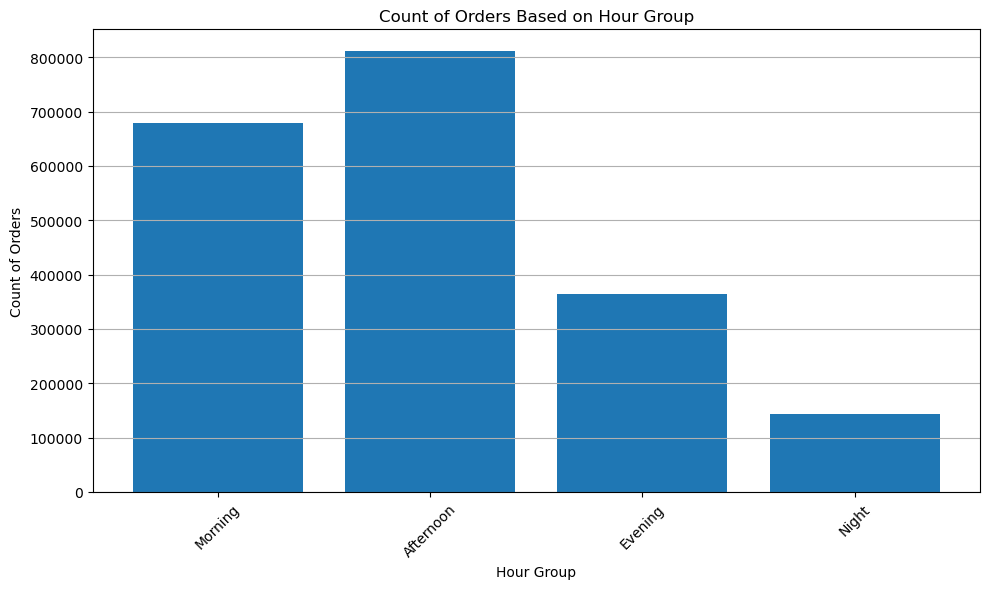

In [61]:
# Convert 'hour_group' to a categorical type with the specified order
hour_order = ['Morning', 'Afternoon', 'Evening', 'Night']
df_final['hour_group'] = pd.Categorical(df_final['hour_group'], categories=hour_order, ordered=True)

# Group by 'hour_group' and count the number of 'order_id's
order_hour_counts = df_final.groupby('hour_group')['order_id'].count().reset_index()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(order_hour_counts['hour_group'], order_hour_counts['order_id'])
plt.title('Count of Orders Based on Hour Group')
plt.xlabel('Hour Group')
plt.ylabel('Count of Orders')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig('count_of_orders_based_on_hour_group.png', bbox_inches='tight', dpi=300)
plt.show()

### analysing how income and age groups vary in their ordering patterns throughout the day (order quantity)

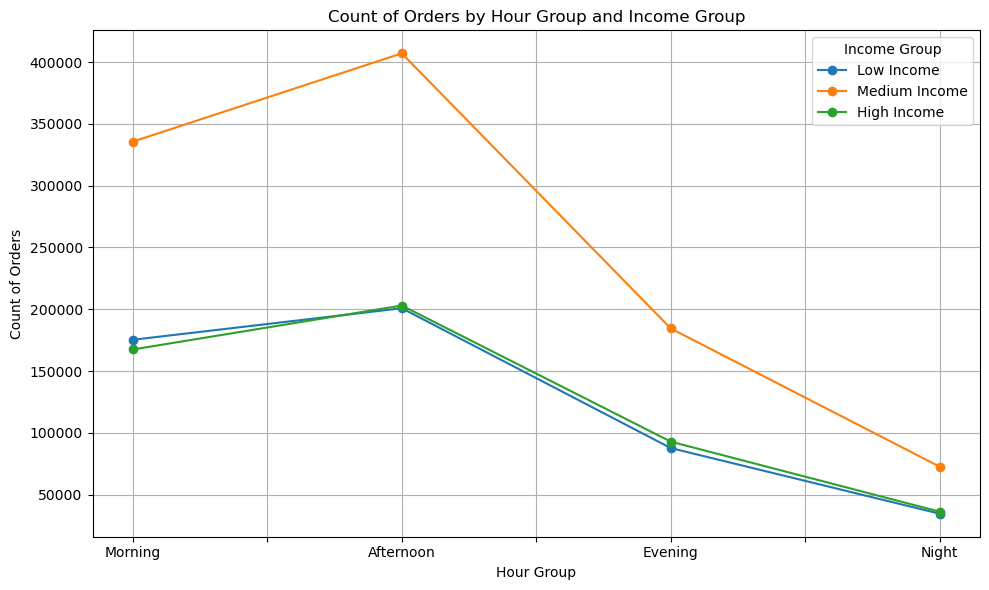

In [62]:
# Create a crosstab for hour_group and income_group
hour_income_crosstab = pd.crosstab(df_final['hour_group'], df_final['Income_group'])

# Sort the index to ensure the x-axis flows in the logical order of the day
hour_income_crosstab = hour_income_crosstab.reindex(['Morning', 'Afternoon', 'Evening', 'Night'])

# Plot the crosstab as a line chart
ax = hour_income_crosstab.plot(kind='line', figsize=(10, 6), marker='o')

# Customize the chart
plt.title('Count of Orders by Hour Group and Income Group')
plt.xlabel('Hour Group')
plt.ylabel('Count of Orders')
plt.xticks(rotation=0)  # Ensure x-axis labels are readable
plt.grid(axis='both')
plt.legend(title='Income Group')
plt.tight_layout()

# Adjust layout and save the figure
plt.savefig('count_of_orders_by_hour_and_income_group.png', bbox_inches='tight', dpi=300)
plt.show()

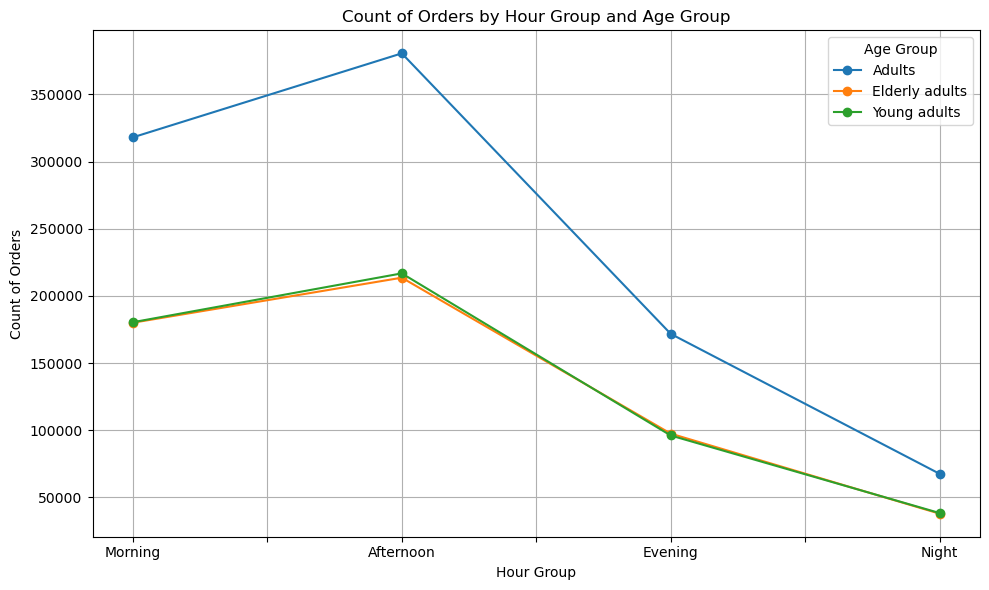

In [63]:
# Create a crosstab with hour_group on the index and age_group as columns
hour_age_crosstab = pd.crosstab(df_final['hour_group'], df_final['Age_group'])

# Reorder the hour groups for a logical flow in the day
hour_age_crosstab = hour_age_crosstab.reindex(['Morning', 'Afternoon', 'Evening', 'Night'])

# Plot the crosstab as a line chart
ax = hour_age_crosstab.plot(kind='line', figsize=(10, 6), marker='o')

# Customize the chart
plt.title('Count of Orders by Hour Group and Age Group')
plt.xlabel('Hour Group')
plt.ylabel('Count of Orders')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal for readability
plt.grid(axis='both')
plt.legend(title='Age Group')  # Set legend title to Age Group
plt.tight_layout()

# Adjust layout and save the figure
plt.savefig('count_of_orders_by_hour_and_age_group.png', bbox_inches='tight', dpi=300)
plt.show()

### 💰 13. analyzing the distribution of price ranges and their frequency

In [64]:
df_final[df_final['prices']>10000].count()

order_id                      324
user_id                       324
order_number                  324
orders_day_of_week            324
order_hour_of_day             324
days_since_prior_order        310
product_id                    324
add_to_cart_order             324
reordered                     324
Unnamed: 0                    324
product_name                  324
aisle_id                      324
department_id                 324
prices                        324
busiest_day                   324
busiest_period_of_day         324
max_order                     324
loyalty_flag                  324
avg_product_price             324
spending_flag                 324
median_days_between_orders    324
order_frequency_flag          324
Gender                        324
State                         324
Age                           324
Date Joined                   324
Number of Dependents          324
Family Status                 324
Income                        324
region        

In [65]:
df_final_dist=df_final[df_final['prices']<10000]

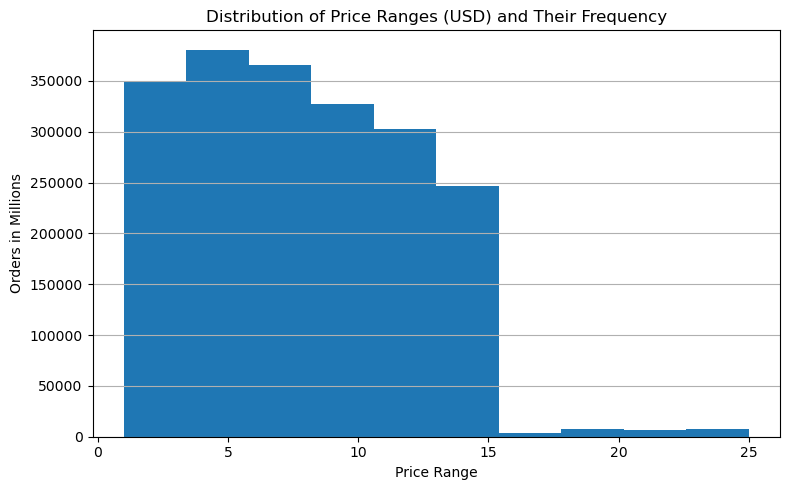

In [66]:
# Plotting the histogram for the 'prices' column
hist_o = df_final_dist['prices'].plot.hist( figsize=(8, 5))


# Adding a title and labels
plt.title('Distribution of Price Ranges (USD) and Their Frequency')
plt.xlabel('Price Range')
plt.ylabel('Orders in Millions')
plt.grid(axis='y')  # Optional: add grid lines for better readability

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig('distribution_of_price_ranges.png', bbox_inches='tight', dpi=300)

# Show the plot
plt.show()

### 🍏 14. analyzing departments and order quantity

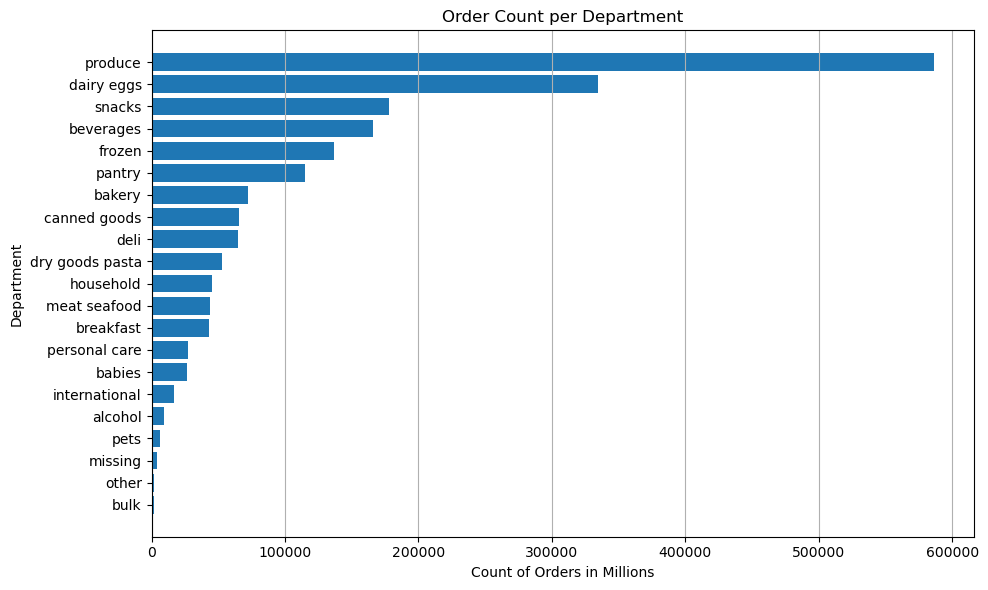

In [67]:
# Group by 'department' and count the number of 'order_id's
dept_order_counts = df_final.groupby('department')['order_id'].count().reset_index()

# Sort the counts in descending order
dept_order_counts = dept_order_counts.sort_values(by='order_id', ascending=True)

# Plot the counts as a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(dept_order_counts['department'], dept_order_counts['order_id'])

# Add a title and labels
plt.title('Order Count per Department')
plt.ylabel('Department')  # y-axis label since the bars are horizontal
plt.xlabel('Count of Orders in Millions')
plt.grid(axis='x')  # Add grid lines on the x-axis for better readability

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig('order_count_per_department.png', bbox_inches='tight', dpi=300)

# Show the plot
plt.show()

### 15. aggregation (max, mean, min) based on frequency flag and spending flag (expenditure)

In [68]:
df_final.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,Unnamed: 0,...,Family Status,Income,region,exclusion_flag,Age_group,Income_group,department,dependants_group,day_group,hour_group
0,1502001,192797,51,1,13,7.0,5120,2,1,5120.0,...,single,34213,Midwest,Regular-activity customer,Adults,Low Income,dairy eggs,no kids,Weekend,Afternoon
1,2618071,99495,71,5,21,2.0,5785,11,1,5785.0,...,married,129850,West,Regular-activity customer,Adults,High Income,dairy eggs,small family (1 kid),Weekday,Night
2,68578,173186,15,1,11,11.0,29094,28,1,29096.0,...,single,46462,South,Regular-activity customer,Young adults,Low Income,dairy eggs,no kids,Weekend,Morning
3,269326,152406,35,5,10,7.0,5750,18,1,5750.0,...,married,101334,South,Regular-activity customer,Adults,Medium Income,dairy eggs,big family (2-3 kids),Weekday,Morning
4,1030934,81942,20,6,10,6.0,17949,7,1,17949.0,...,living with parents and siblings,82283,Midwest,Regular-activity customer,Young adults,Medium Income,dairy eggs,small family (1 kid),Weekday,Morning


In [69]:
df.user_id.nunique()

206209

In [70]:


# Perform the groupby operation on the sampled dataset
custom_profiling = df_final.groupby(
    ['order_frequency_flag','spending_flag'])['prices'].sum().reset_index()


In [71]:
custom_profiling

,order_frequency_flag,spending_flag,prices
0,Frequent customer,High spender,5723550.7
1,Frequent customer,Low spender,10432565.6
2,Non-frequent customer,High spender,1176433.5
3,Non-frequent customer,Low spender,1427512.5
4,Regular customer,High spender,1988666.5
5,Regular customer,Low spender,3389412.1


In [72]:
# Creating aggregation by income_group for order_number & prices
custom_profiling = df_final.groupby(['order_frequency_flag','spending_flag']).agg({'prices':['max','min','mean']})

In [73]:
custom_profiling

prices                 
                                         max  min        mean
order_frequency_flag  spending_flag                          
Frequent customer     High spender   99999.0  1.0  213.104129
                      Low spender       25.0  1.0    7.784190
Non-frequent customer High spender   99999.0  1.0  349.401099
                      Low spender       25.0  1.0    7.762861
Regular customer      High spender   99999.0  1.0  230.249682
                      Low spender       25.0  1.0    7.787599

In [ ]:
# Creating aggregation by dependent_category for order_number & prices
dependent_group_agg = custom_profiling.groupby('dependants_group').agg({'order_number':['max','min','mean'],'prices':['max','min','mean']})

In [75]:
loyalty_vs_region_orders = df_final.groupby(['loyalty_flag', 'region'])['order_id'].nunique().unstack(fill_value=0)
loyalty_vs_age_group_orders = df_final.groupby(['loyalty_flag', 'Age_group'])['order_id'].nunique().unstack(fill_value=0)


<Figure size 1000x600 with 0 Axes>

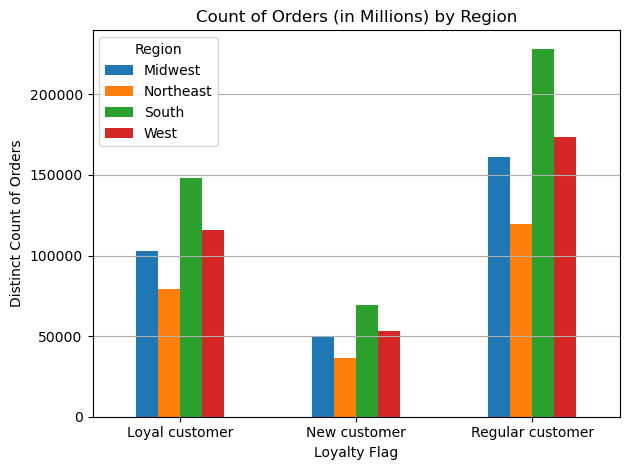

<Figure size 1000x600 with 0 Axes>

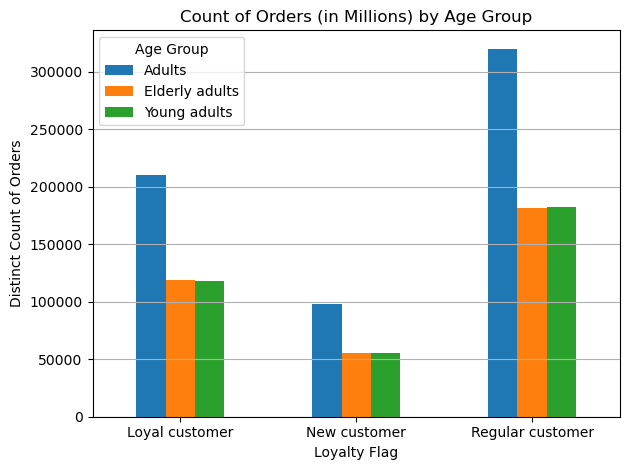

In [108]:
# Plotting the crosstab for Region (Orders)
plt.figure(figsize=(10, 6))
loyalty_vs_region_orders.plot(kind='bar', stacked=False)
plt.title('Count of Orders (in Millions) by Region')
plt.xlabel('Loyalty Flag')
plt.ylabel('Distinct Count of Orders')
plt.xticks(rotation=0)
plt.legend(title='Region')
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('loyalty_vs_region_orders.png', bbox_inches='tight', dpi=300)
plt.show()

# Plotting the crosstab for Age Group (Orders)
plt.figure(figsize=(10, 6))
loyalty_vs_age_group_orders.plot(kind='bar', stacked=False)
plt.title('Count of Orders (in Millions) by Age Group')
plt.xlabel('Loyalty Flag')
plt.ylabel('Distinct Count of Orders')
plt.xticks(rotation=0)
plt.legend(title='Age Group')
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('loyalty_vs_age_group_orders.png', bbox_inches='tight', dpi=300)
plt.show()

<Figure size 1000x600 with 0 Axes>

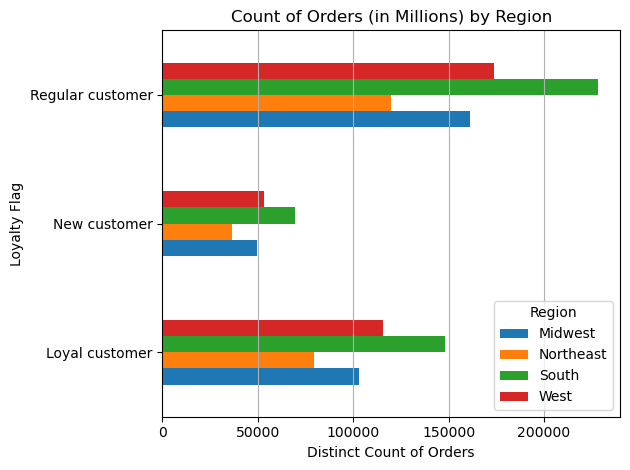

In [109]:
# Plotting the crosstab for Region (Orders) as a horizontal bar chart
plt.figure(figsize=(10, 6))
loyalty_vs_region_orders.plot(kind='barh', stacked=False)
plt.title('Count of Orders (in Millions) by Region')
plt.xlabel('Distinct Count of Orders')
plt.ylabel('Loyalty Flag')
plt.legend(title='Region', loc='best')
plt.grid(axis='x')
plt.tight_layout()
plt.savefig('loyalty_vs_region_orders_horizontal.png', bbox_inches='tight', dpi=300)
plt.show()


<Figure size 1000x600 with 0 Axes>

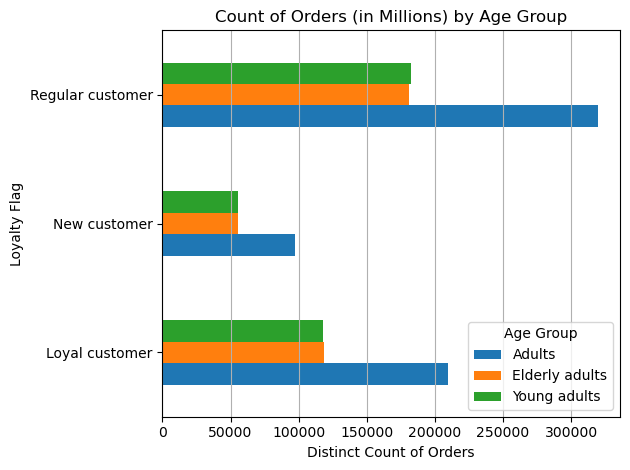

In [110]:
# Plotting the crosstab for Age Group (Orders) as a horizontal bar chart
plt.figure(figsize=(10, 6))
loyalty_vs_age_group_orders.plot(kind='barh', stacked=False)
plt.title('Count of Orders (in Millions) by Age Group')
plt.xlabel('Distinct Count of Orders')
plt.ylabel('Loyalty Flag')
plt.legend(title='Age Group', loc='best')
plt.grid(axis='x')
plt.tight_layout()
plt.savefig('loyalty_vs_age_group_orders_horizontal.png', bbox_inches='tight', dpi=300)
plt.show()


In [77]:
df_final.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,Unnamed: 0,...,Family Status,Income,region,exclusion_flag,Age_group,Income_group,department,dependants_group,day_group,hour_group
0,1502001,192797,51,1,13,7.0,5120,2,1,5120.0,...,single,34213,Midwest,Regular-activity customer,Adults,Low Income,dairy eggs,no kids,Weekend,Afternoon
1,2618071,99495,71,5,21,2.0,5785,11,1,5785.0,...,married,129850,West,Regular-activity customer,Adults,High Income,dairy eggs,small family (1 kid),Weekday,Night
2,68578,173186,15,1,11,11.0,29094,28,1,29096.0,...,single,46462,South,Regular-activity customer,Young adults,Low Income,dairy eggs,no kids,Weekend,Morning
3,269326,152406,35,5,10,7.0,5750,18,1,5750.0,...,married,101334,South,Regular-activity customer,Adults,Medium Income,dairy eggs,big family (2-3 kids),Weekday,Morning
4,1030934,81942,20,6,10,6.0,17949,7,1,17949.0,...,living with parents and siblings,82283,Midwest,Regular-activity customer,Young adults,Medium Income,dairy eggs,small family (1 kid),Weekday,Morning


In [105]:
df_final.shape

(1998209, 37)

In [106]:
df_final.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'Unnamed: 0', 'product_name',
       'aisle_id', 'department_id', 'prices', 'busiest_day',
       'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_product_price', 'spending_flag', 'median_days_between_orders',
       'order_frequency_flag', 'Gender', 'State', 'Age', 'Date Joined',
       'Number of Dependents', 'Family Status', 'Income', 'region',
       'exclusion_flag', 'Age_group', 'Income_group', 'department',
       'dependants_group', 'day_group', 'hour_group'],
      dtype='object')

In [78]:
region_vs_income_group = pd.crosstab(df_final['region'], df_final['Income_group'], values=df_final['order_id'], aggfunc='count')
region_vs_age_group = pd.crosstab(df_final['region'], df_final['Age_group'], values=df_final['order_id'], aggfunc='count')


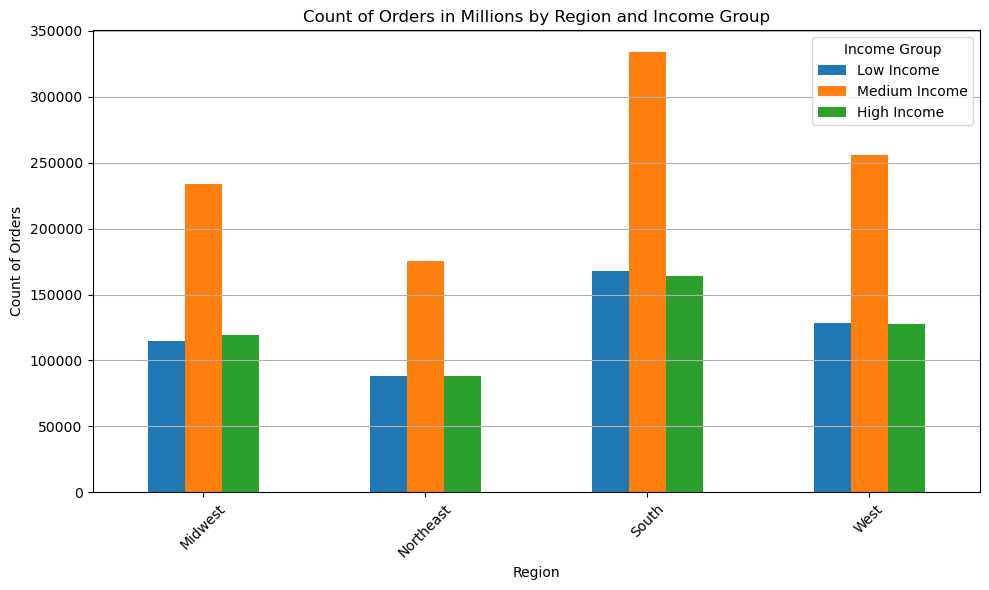

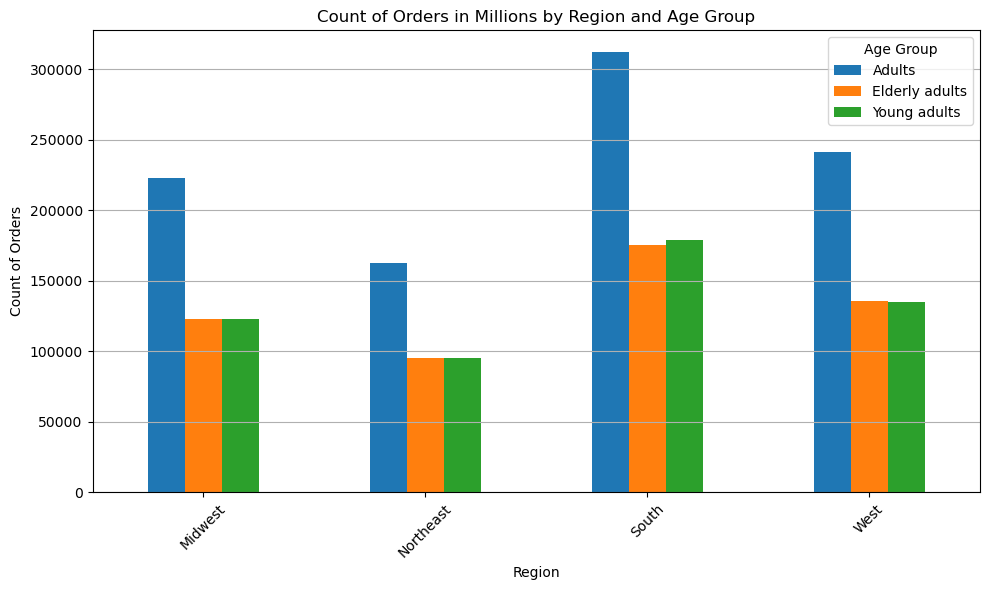

In [79]:
# Define a list of tuples containing the cross-tabulation results and plot titles
plots = [
    (region_vs_income_group, 'Income Group', 'Count of Orders in Millions by Region and Income Group', 'region_vs_income_group.png'),
    (region_vs_age_group, 'Age Group', 'Count of Orders in Millions by Region and Age Group', 'region_vs_age_group.png')
]

# Iterate over the list and create plots for each cross-tabulation
for crosstab, legend_title, title, filename in plots:
    plt.figure(figsize=(10, 6))
    
    # Plot the crosstab data with regions on the x-axis
    crosstab.plot(kind='bar', stacked=False, ax=plt.gca())
    
    plt.title(title)
    plt.xlabel('Region')  # Set the x-axis label to 'Region'
    plt.ylabel('Count of Orders')
    plt.xticks(rotation=45)
    plt.legend(title=legend_title)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.savefig(filename, bbox_inches='tight', dpi=300)
    plt.show()

## Based on region

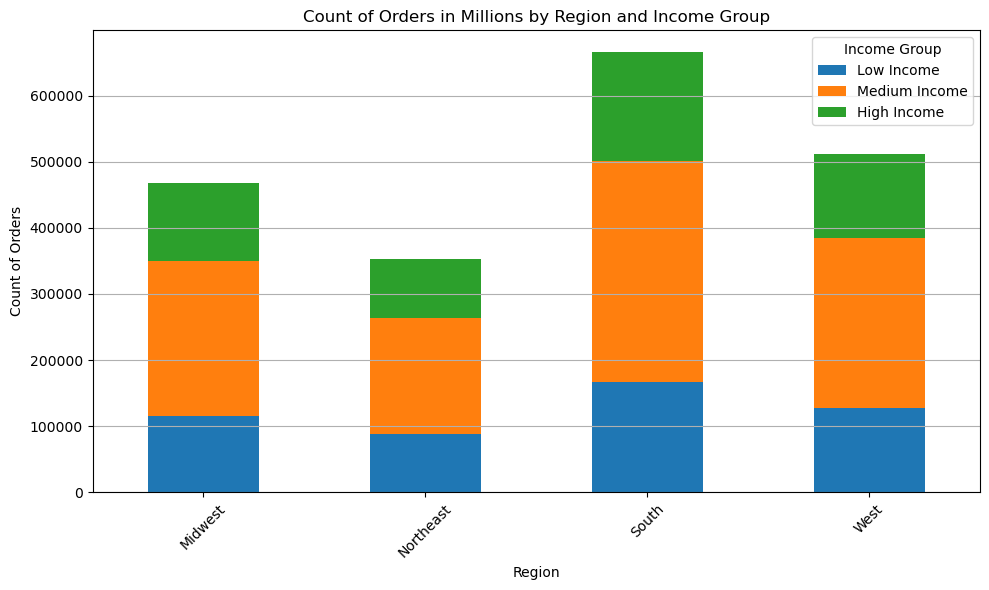

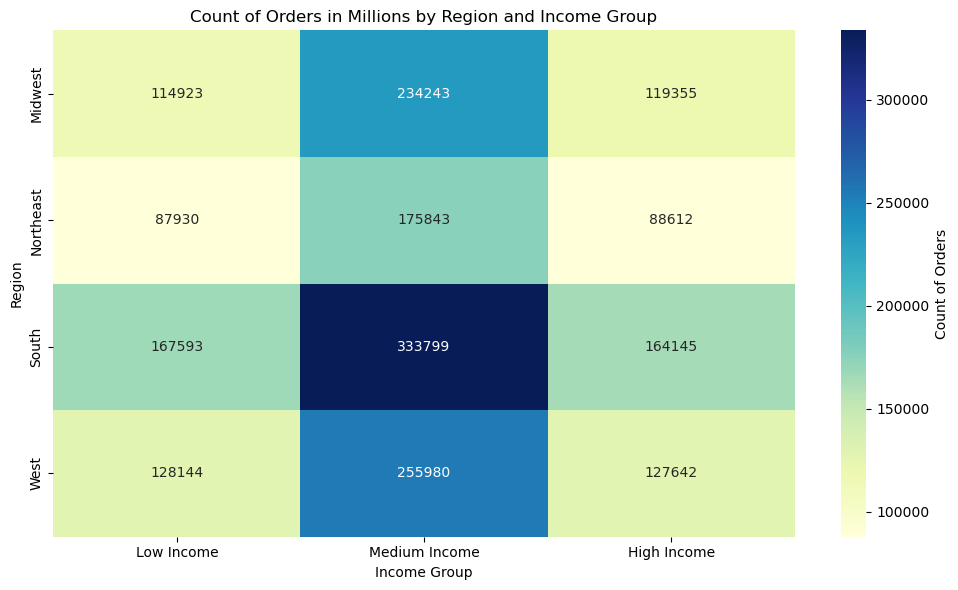

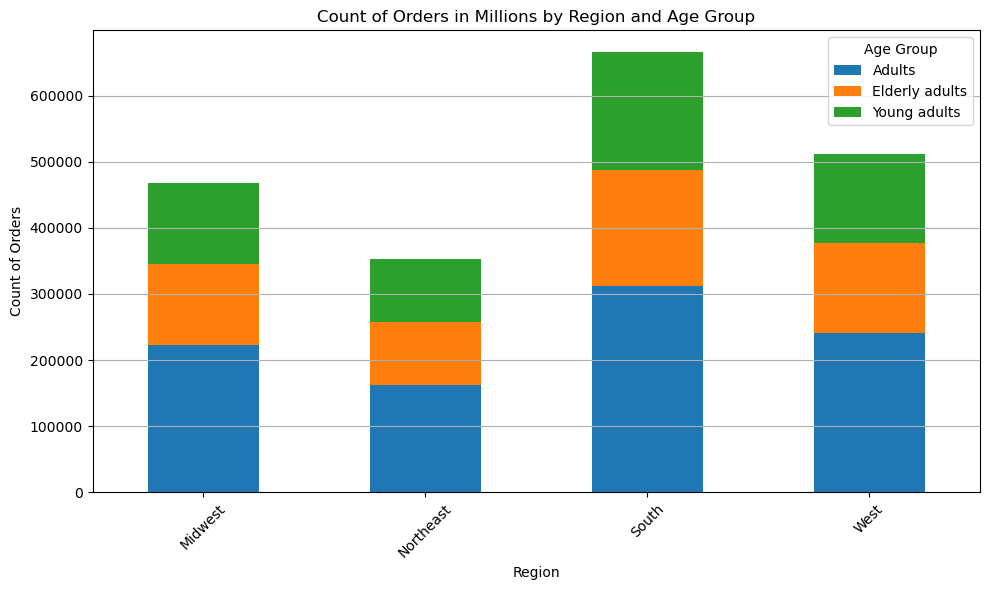

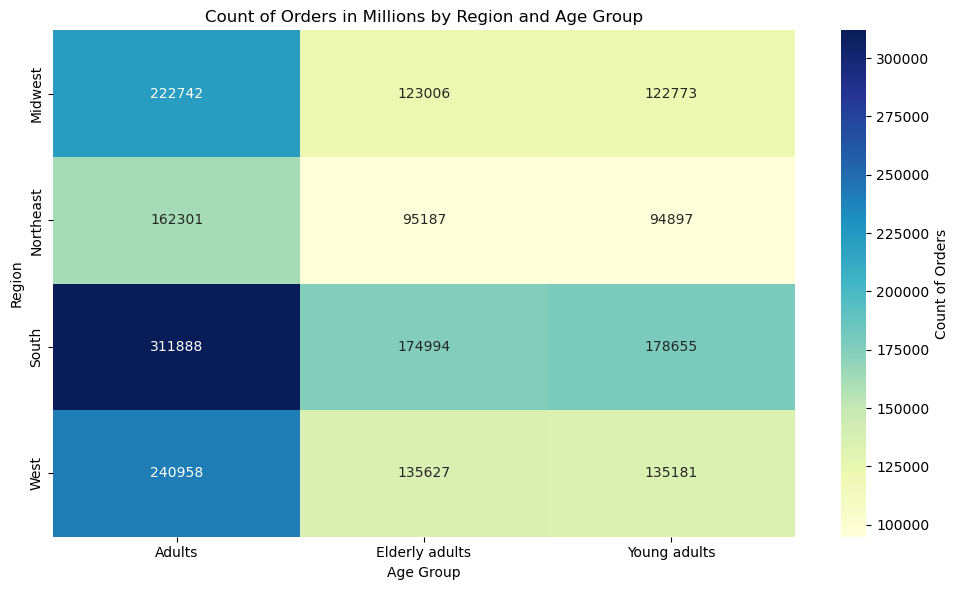

In [80]:
# Generate cross-tabulations
region_vs_income_group = pd.crosstab(
    df_final['region'], 
    df_final['Income_group'], 
    values=df_final['order_id'], 
    aggfunc='count'
)

region_vs_age_group = pd.crosstab(
    df_final['region'], 
    df_final['Age_group'], 
    values=df_final['order_id'], 
    aggfunc='count'
)

# Define a list of tuples containing the cross-tabulation results and plot titles
plots = [
    (region_vs_income_group, 'Income Group', 'Count of Orders in Millions by Region and Income Group', 'region_vs_income_group.png'),
    (region_vs_age_group, 'Age Group', 'Count of Orders in Millions by Region and Age Group', 'region_vs_age_group.png')
]

# Iterate over the list to create both stacked bar charts and heatmaps
for crosstab, legend_title, title, filename in plots:
    # Stacked Bar Chart
    plt.figure(figsize=(10, 6))
    crosstab.plot(kind='bar', stacked=True, ax=plt.gca())  # Create a stacked bar chart
    plt.title(title)
    plt.xlabel('Region')
    plt.ylabel('Count of Orders')
    plt.xticks(rotation=45)
    plt.legend(title=legend_title)
    plt.grid(axis='y')
    plt.tight_layout()
    stacked_filename = filename.replace('.png', '_stacked.png')
    plt.savefig(stacked_filename, bbox_inches='tight', dpi=300)
    plt.show()

    # Heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(crosstab, annot=True, fmt="g", cmap="YlGnBu", cbar_kws={'label': 'Count of Orders'})  # Create a heatmap
    plt.title(title)
    plt.xlabel(legend_title)
    plt.ylabel('Region')
    heatmap_filename = filename.replace('.png', '_heatmap.png')
    plt.tight_layout()
    plt.savefig(heatmap_filename, bbox_inches='tight', dpi=300)
    plt.show()


In [ ]:
# Select columns that contain '_flag' in their names
flag_columns = df_final.filter(like='_flag').columns

# Print unique values for each of the '_flag' columns
for col in flag_columns:
    unique_values = df_final[col].unique()
    print(f"Column: {col}\nUnique Categories: {unique_values}\n")

### 16. customer behaviours: flags, groups and regions

### flag info:

➔ loyalty_flag

Loyal Customers: Made more than 40 orders.
Regular Customers: Made 11 to 40 orders.
New Customers: Made 10 orders or fewer.
    
➔ spending_flag

Low Spenders: Average purchase price is less than 10.
High Spenders: Average purchase price is 10 or more.

➔ frequency_flag

Non-Frequent Customers: Order every more than 20 days.
Regular Customers: Order every 11 to 20 days.
Frequent Customers: Order every 10 days or fewer.

➔ exclusion_flag
Customers with less than 5 orders (low-activity customer) were excluded from the current dataframe.

### frequency flag x order count 

In [ ]:
# Create crosstabs for 'frequency_flag' counting unique order_id
frequency_vs_fam_status = df_final.groupby(['frequency_flag', 'fam_status'])['order_id'].nunique().unstack(fill_value=0)
frequency_vs_income_group = df_final.groupby(['frequency_flag', 'income_group'])['order_id'].nunique().unstack(fill_value=0)
frequency_vs_region = df_final.groupby(['frequency_flag', 'region'])['order_id'].nunique().unstack(fill_value=0)
frequency_vs_age_group = df_final.groupby(['frequency_flag', 'age_group'])['order_id'].nunique().unstack(fill_value=0)

# Plotting the crosstab for Family Status
plt.figure(figsize=(10, 6))
frequency_vs_fam_status.plot(kind='bar', stacked=False)
plt.title('Count of Orders (in Millions) by Family Status')
plt.xlabel('Frequency Flag')
plt.ylabel('Distinct Count of Orders')
plt.xticks(rotation=0)
plt.legend(title='Family Status')
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('frequency_vs_fam_status_orders.png', bbox_inches='tight', dpi=300)
plt.show()

# Plotting the crosstab for Income Group
plt.figure(figsize=(10, 6))
frequency_vs_income_group.plot(kind='bar', stacked=False)
plt.title('Count of Orders (in Millions) by Income Group')
plt.xlabel('Frequency Flag')
plt.ylabel('Distinct Count of Orders')
plt.xticks(rotation=0)
plt.legend(title='Income Group')
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('frequency_vs_income_group_orders.png', bbox_inches='tight', dpi=300)
plt.show()

# Plotting the crosstab for Region
plt.figure(figsize=(10, 6))
frequency_vs_region.plot(kind='bar', stacked=False)
plt.title('Count of Orders (in Millions) by Region')
plt.xlabel('Frequency Flag')
plt.ylabel('Distinct Count of Orders')
plt.xticks(rotation=0)
plt.legend(title='Region')
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('frequency_vs_region_orders.png', bbox_inches='tight', dpi=300)
plt.show()

# Plotting the crosstab for Age Group
plt.figure(figsize=(10, 6))
frequency_vs_age_group.plot(kind='bar', stacked=False)
plt.title('Count of Orders (in Millions) by Age Group')
plt.xlabel('Frequency Flag')
plt.ylabel('Distinct Count of Orders')
plt.xticks(rotation=0)
plt.legend(title='Age Group')
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('frequency_vs_age_group_orders.png', bbox_inches='tight', dpi=300)
plt.show()

## Spending flag x Family Status  (Based on region)

In [81]:
# Grouping by 'spending_flag' and 'fam_status' to get order counts
spending_vs_fam_status_order = df_final.groupby(['spending_flag', 'Family Status'])['order_id'].count().unstack(fill_value=0)
spending_vs_income_group_order = df_final.groupby(['spending_flag', 'Income_group'])['order_id'].count().unstack(fill_value=0)
spending_vs_region_order = df_final.groupby(['spending_flag', 'region'])['order_id'].count().unstack(fill_value=0)
spending_vs_age_group_order = df_final.groupby(['spending_flag', 'Age_group'])['order_id'].count().unstack(fill_value=0)


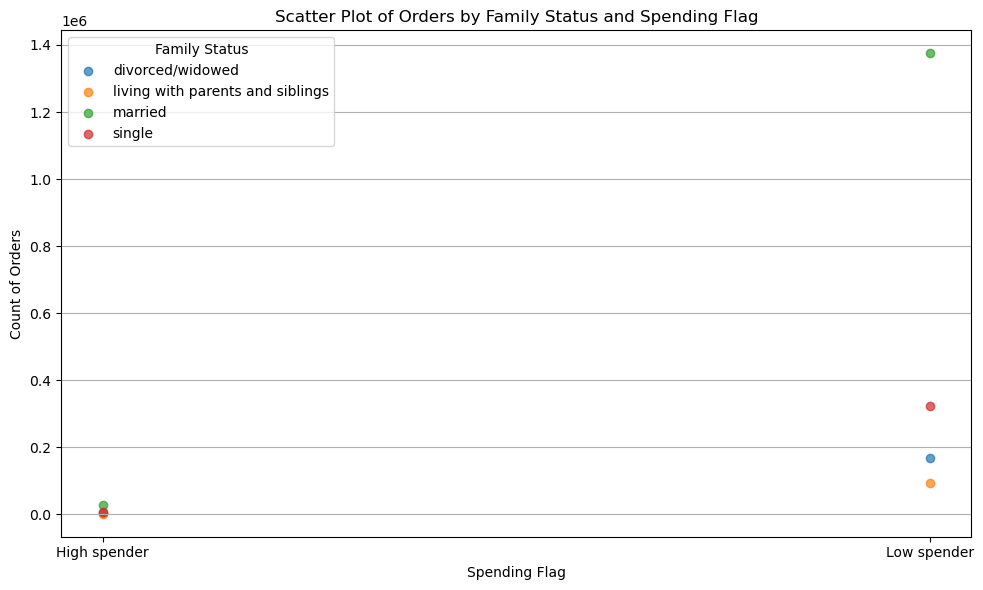

In [82]:
# Scatter Plot for Spending Flag vs Family Status
plt.figure(figsize=(10, 6))
for status in spending_vs_fam_status_order.columns:
    plt.scatter(
        spending_vs_fam_status_order.index,
        spending_vs_fam_status_order[status],
        label=status,
        alpha=0.7
    )
plt.title('Scatter Plot of Orders by Family Status and Spending Flag')
plt.xlabel('Spending Flag')
plt.ylabel('Count of Orders')
plt.legend(title='Family Status')
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('scatter_orders_by_family_status.png', bbox_inches='tight', dpi=300)
plt.show()

# Repeat similar code for Income Group, Region, and Age Group.


<Figure size 1200x800 with 0 Axes>

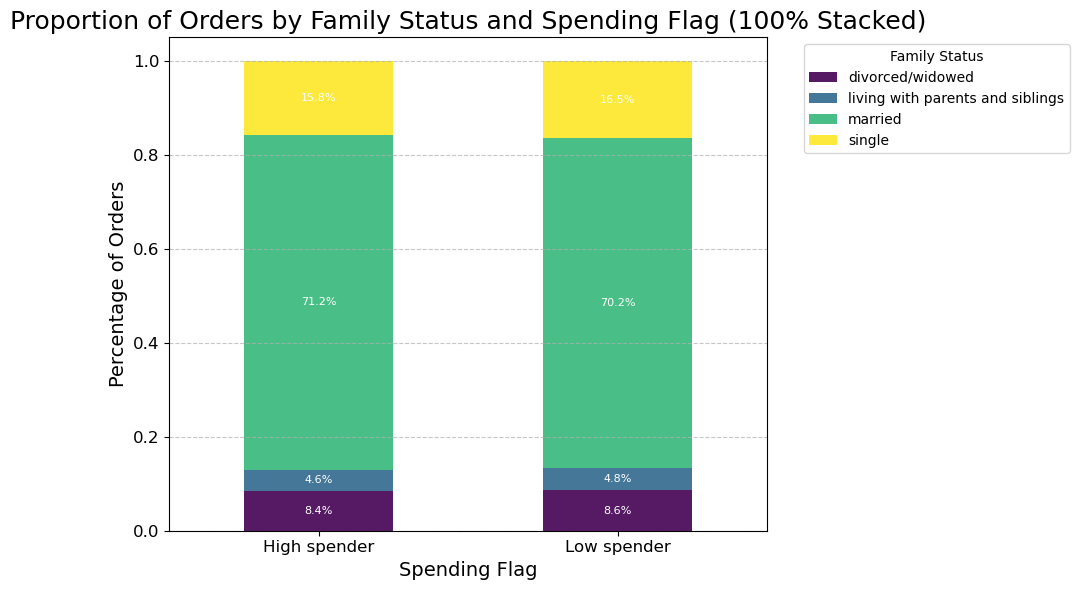

In [115]:
# Normalizing data to percentages
spending_vs_fam_status_percentage = spending_vs_fam_status_order.div(spending_vs_fam_status_order.sum(axis=1), axis=0)

# Plotting
plt.figure(figsize=(12, 8))
ax = spending_vs_fam_status_percentage.plot(
    kind='bar', stacked=True, colormap='viridis', figsize=(10, 6), alpha=0.9
)

# Add percentage annotations
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    if height > 0.01:  # Only annotate visible segments
        ax.text(x + width / 2, y + height / 2,
                f'{height:.1%}', ha='center', va='center', fontsize=8, color='white')

# Customize appearance
plt.title('Proportion of Orders by Family Status and Spending Flag (100% Stacked)', fontsize=18)
plt.xlabel('Spending Flag', fontsize=14)
plt.ylabel('Percentage of Orders', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Family Status', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('refined_percentage_orders_by_family_status.png', bbox_inches='tight', dpi=300)
plt.show()


### loyalty flag x customer count

### loyalty flag x order count

### 17. analysing ordering behaviour by departments and different customers groups

### 18. saving recent dataframe with excluded low activity customers

In [ ]:
# exporting data to pkl

df_final.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'df_final_achievement.pkl'))